In [1]:
############################################################
# -------------------------------------------------------- #
#     El Atractor de Lorenz, ejemplo de Caos dinámico      #
#                         Caso 2
# -------------------------------------------------------- #
#
# ___________________________Jessica Isamar Uriarte Garcia #
# ________________________________________26 de Abril 2018 #
############################################################

%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, matplotlib.font_manager as fm, os
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
# define the initial system state (aka x, y, z positions in space)
initial_state = [0.1, 0, 0]

# define the system parameters sigma, rho, and beta
sigma = 28
rho   = 46.92
beta  = 4

# define the time points to solve for, evenly spaced between the start and end times
start_time = 0
end_time = 100
time_points = np.linspace(start_time, end_time, end_time*100)

In [3]:
# define the lorenz system
# x, y, and z make up the system state, t is time, and sigma, rho, beta are the system parameters
def lorenz_system(current_state, t):
    
    # positions of x, y, z in space at the current time point
    x, y, z = current_state
    
    # define the 3 ordinary differential equations known as the lorenz equations
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    # return a list of the equations that describe the system
    return [dx_dt, dy_dt, dz_dt]

In [4]:
# use odeint() to solve a system of ordinary differential equations
# the arguments are: 
# 1, a function - computes the derivatives
# 2, a vector of initial system conditions (aka x, y, z positions in space)
# 3, a sequence of time points to solve for
# returns an array of x, y, and z value arrays for each time point, with the initial values in the first row
xyz = odeint(lorenz_system, initial_state, time_points)

# extract the individual arrays of x, y, and z values from the array of arrays
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

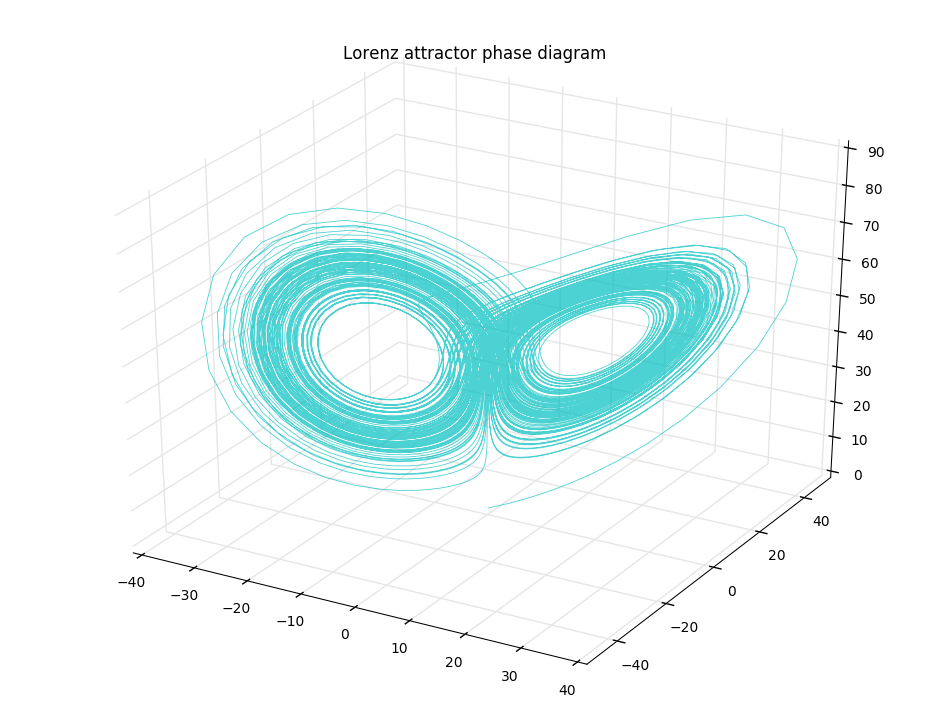

In [5]:
# plot the lorenz attractor in three-dimensional phase space
fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.plot(x, y, z, color='c', alpha=0.7, linewidth=0.6)
ax.set_title('Lorenz attractor phase diagram')

fig.savefig('case2_LorenzAttractor3D.png', dpi=180, bbox_inches='tight')
plt.show()

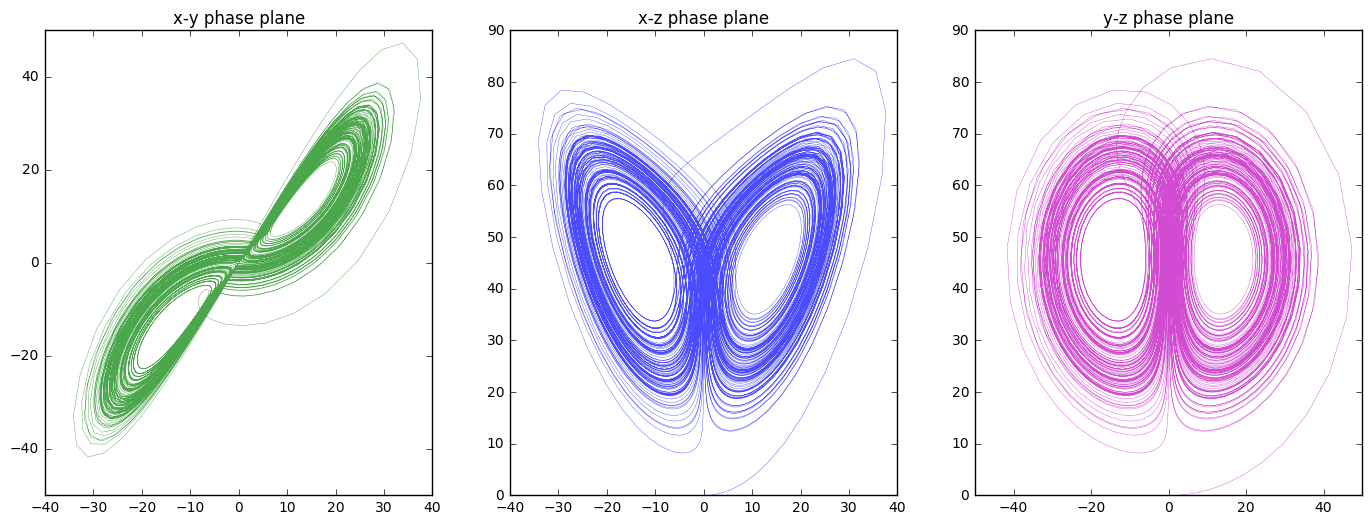

In [6]:
# now plot two-dimensional cuts of the three-dimensional phase space
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 6))

# plot the x values vs the y values
ax[0].plot(x, y, color='g', alpha=0.7, linewidth=0.3)
ax[0].set_title('x-y phase plane')

# plot the x values vs the z values
ax[1].plot(x, z, color='b', alpha=0.7, linewidth=0.3)
ax[1].set_title('x-z phase plane')

# plot the y values vs the z values
ax[2].plot(y, z, color='m', alpha=0.7, linewidth=0.3)
ax[2].set_title('y-z phase plane')

fig.savefig('case2_PhasePlane.png', dpi=180, bbox_inches='tight')
plt.show()